In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# !pip install keras
# !pip install Keras-Applications
from keras import applications
import keras
# !pip install git+https://github.com/rcmalli/keras-vggface.git
# from keras_vggface.vggface import VGGFace
!pip install deepface
from deepface.basemodels import VGGFace
!pip install tensorflow==2.2.2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imutils import paths
from tensorflow.keras.applications import VGG16
# from keras.applications import imagenet_utils
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
import cv2
import numpy as np
import random
import os

In [ ]:

from tensorflow.keras.utils import normalize, to_categorical
images = []
folder="gdrive/MyDrive/Image_xuly"
for i in range(1,710):
    filename = str(i) + ".jpg"
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
        images.append(img)
X_train = np.array(images)
Y_train = np.loadtxt('gdrive/MyDrive/Y_train.txt')
X_val, y_val = X_train[425:565], Y_train[425:565]
X_test, y_test = X_train[565:], Y_train[565:]
X_train, y_train = X_train[:425], Y_train[:425]
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
X_val = normalize(X_val, axis=1)
Y_train = to_categorical(y_train, 2)
Y_val = to_categorical(y_val, 2)
Y_test = to_categorical(y_test, 2)

In [ ]:
#pre-trained VGG16
# baseModel = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
!pip install keras_vggface
!pip install keras_applications
from keras_vggface.vggface import VGGFace
baseModel = VGGFace(model='vgg16', include_top=False, input_shape=(224, 224, 3), pooling='avg')
print(len(baseModel.layers))
for layer in baseModel.layers:
    print(layer)
# Xây thêm các layer
# Lấy output của ConvNet trong VGG16
fcHead = baseModel.output

# Flatten trước khi dùng FCs
fcHead = Flatten(name='flatten')(fcHead)
# Thêm FC
fcHead = Dense(256, activation='relu')(fcHead)
fcHead = Dense(256, activation='relu')(fcHead)
fcHead = Dense(128, activation='relu')(fcHead)
fcHead = Dropout(0.2)(fcHead)
# Output layer với softmax activation
fcHead = Dense(2, activation='softmax')(fcHead)

# Xây dựng model bằng việc nối ConvNet của VGG16 và fcHead
model = model = Model(inputs=baseModel.input, outputs=fcHead)

In [ ]:

# freeze VGG model
for layer in baseModel.layers:
    layer.trainable = False 
opt = RMSprop(0.001)
model.compile(loss='categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
        batch_size=32, epochs=30, verbose=1) 

Epoch 1/30
14/14 [==============================] - 280s 20s/step - loss: 0.6864 - accuracy: 0.5418 - val_loss: 0.6251 - val_accuracy: 0.8143
Epoch 2/30
14/14 [==============================] - 276s 20s/step - loss: 0.5924 - accuracy: 0.8268 - val_loss: 0.5811 - val_accuracy: 0.6786
Epoch 3/30
14/14 [==============================] - 277s 20s/step - loss: 0.4509 - accuracy: 0.8301 - val_loss: 0.3969 - val_accuracy: 0.8571
Epoch 4/30
14/14 [==============================] - 277s 20s/step - loss: 0.3139 - accuracy: 0.8596 - val_loss: 0.3188 - val_accuracy: 0.8929
Epoch 5/30
14/14 [==============================] - 276s 20s/step - loss: 0.2441 - accuracy: 0.9146 - val_loss: 0.3488 - val_accuracy: 0.8500
Epoch 6/30
14/14 [==============================] - 277s 20s/step - loss: 0.2394 - accuracy: 0.9030 - val_loss: 0.2810 - val_accuracy: 0.8786
Epoch 7/30
14/14 [==============================] - 276s 20s/step - loss: 0.2544 - accuracy: 0.8910 - val_loss: 0.2843 - val_accuracy: 0.8714
Epoch 

In [ ]:
# unfreeze 2 CNN layer:
for layer in baseModel.layers[18:]:
    layer.trainable = True
    print(layer.trainable)
opt = SGD(0.001)
model.compile(loss='categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
        batch_size=32, epochs=30, verbose=1)

True
True
Epoch 1/30
14/14 [==============================] - 274s 20s/step - loss: 0.0783 - accuracy: 0.9775 - val_loss: 0.3091 - val_accuracy: 0.8857
Epoch 2/30
14/14 [==============================] - 272s 20s/step - loss: 0.1100 - accuracy: 0.9770 - val_loss: 0.3009 - val_accuracy: 0.8929
Epoch 3/30
14/14 [==============================] - 272s 20s/step - loss: 0.1197 - accuracy: 0.9645 - val_loss: 0.3000 - val_accuracy: 0.9000
Epoch 4/30
14/14 [==============================] - 272s 20s/step - loss: 0.0727 - accuracy: 0.9751 - val_loss: 0.3015 - val_accuracy: 0.8929
Epoch 5/30
14/14 [==============================] - 272s 20s/step - loss: 0.1535 - accuracy: 0.9566 - val_loss: 0.2995 - val_accuracy: 0.9000
Epoch 6/30
14/14 [==============================] - 272s 20s/step - loss: 0.0925 - accuracy: 0.9712 - val_loss: 0.3064 - val_accuracy: 0.8857
Epoch 7/30
14/14 [==============================] - 272s 20s/step - loss: 0.1095 - accuracy: 0.9714 - val_loss: 0.3008 - val_accuracy: 0.9

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: gdrive/MyDrive/my_model/assets


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


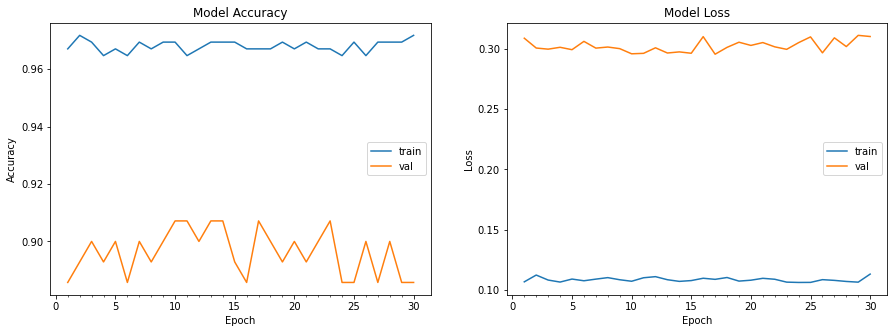

              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89        70
         1.0       0.86      0.97      0.91        74

    accuracy                           0.90       144
   macro avg       0.91      0.90      0.90       144
weighted avg       0.91      0.90      0.90       144

[0.2889614701271057, 0.9027777910232544]
[[0.00952333 0.9904766 ]]
Giá trị dự đoán:  1
Giá trị dự đoán:  0


<Figure size 432x288 with 0 Axes>

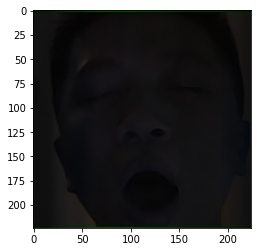

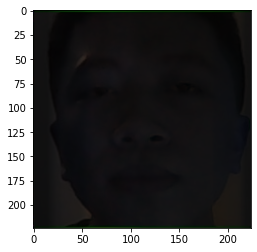

In [ ]:
import matplotlib.pyplot as plt

# from tensorflow import keras
# H = keras.models.load_model('gdrive/MyDrive/my_model')
model.save("gdrive/MyDrive/my_model")
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(model_history.history[acc]) + 1), model_history.history[acc])
    axs[0].plot(range(1, len(model_history.history[val_acc]) + 1), model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history[acc]) + 1), len(model_history.history[acc]) / 10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss']) + 1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss']) + 1), len(model_history.history['loss']) / 10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    plt.savefig('roc.png')
 
plot_model_history(H)
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
pre = model.predict(X_test)
pre_ = np.arange(len(pre))
for i in range(0, len(pre)):
  pre_[i] = np.argmax(pre[i])
print(classification_report(y_test, pre_))
print(score)
# 10. Dự đoán ảnh
plt.figure()
plt.imshow(X_test[7])

y_predict = model.predict(X_test[7].reshape(1,224,224,3))
print(y_predict)
print('Giá trị dự đoán: ', np.argmax(y_predict))
plt.figure()
plt.imshow(X_test[8])

y_predict = model.predict(X_test[8].reshape(1,224,224,3))
print('Giá trị dự đoán: ', np.argmax(y_predict))